In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def get_movie_data(movie_title, api_key):
    url = f"http://www.omdbapi.com/?t={movie_title}&apikey={api_key}"
    response = requests.get(url)
    data = response.json()
    
    if response.status_code != 200:
        print(f"Erro ao acessar a API: {response.status_code}")
        return None
    
    if 'Error' in data:
        if data['Error'] == 'Movie not found!':
            print(f"Filme não encontrado para '{movie_title}'")
        else:
            print(f"Erro na resposta da API para '{movie_title}': {data['Error']}")
        return None
    
    if data.get('Response') == 'False':
        print(f"Nenhum dado de filme foi retornado para '{movie_title}'. Verifique o título do filme.")
        return None
    
    return data

In [3]:
# Lista dos títulos dos filmes
movie_titles = [
    'Eternal Sunshine of the Spotless Mind',
    'The Truman Show',
    'The Prestige',
    'Saving Private Ryan',
    'Schindler\'s List',
    'Catch Me If You Can',
    'Bridge of Spies',
    'Lincoln',
    'The Terminal',
    'War Horse',
    'Munich',
    'The Color Purple',
    'E.T. the Extra-Terrestrial',
    'Parasite',
    'Get Out',
    'The Shape of Water',
    'La La Land',
    'Mad Max: Fury Road',
    'Inception',
    'Interstellar',
    'The Dark Knight',
    'The Revenant',
    'Birdman',
    'Whiplash',
    'The Grand Budapest Hotel',
    'Gravity',
    '12 Years a Slave',
    'The Social Network',
    'The King\'s Speech',
    'Avatar',
    'The Hurt Locker',
    'Slumdog Millionaire',
    'No Country for Old Men',
    'There Will Be Blood',
    'The Departed',
    'Pan\'s Labyrinth',
    'The Lord of the Rings: The Return of the King',
    'The Pianist',
    'A Beautiful Mind',
    'Gladiator',
    'American Beauty',
    'Saving Private Ryan',
    'Forrest Gump',
    'Pulp Fiction',
    'Schindler\'s List',
    'The Shawshank Redemption',
    'Goodfellas',
    'Terminator 2: Judgment Day',
    'The Silence of the Lambs',
    'Good Will Hunting',
    'The Matrix',
    'Fight Club',
    'Braveheart',
    'Jurassic Park',
    'Titanic',
    'The Lion King',
    'Aladdin',
    'Beauty and the Beast',
    'The Little Mermaid'
]

In [4]:
api_key = '3f01c795'

In [5]:
movies_data = []

for title in movie_titles:
    data = get_movie_data(title, api_key)
    if data:
        movies_data.append({
            'Title': data.get('Title', 'N/A'),
            'Year': data.get('Year', 'N/A'),
            'imdbRating': data.get('imdbRating', 'N/A'),
            'Genre': data.get('Genre', 'N/A'),
            'Director': data.get('Director', 'N/A')
        })

In [6]:
df = pd.DataFrame(movies_data)

In [7]:
df = df[df['imdbRating'] != 'N/A']
df['imdbRating'] = df['imdbRating'].astype(float)

In [8]:
print(df)

                                            Title       Year  imdbRating  \
0           Eternal Sunshine of the Spotless Mind       2004         8.3   
1                                 The Truman Show       1998         8.2   
2                                    The Prestige       2006         8.5   
3                             Saving Private Ryan       1998         8.6   
4                                Schindler's List       1993         9.0   
5                             Catch Me If You Can       2002         8.1   
6                                 Bridge of Spies       2015         7.6   
7                                         Lincoln       2012         7.3   
8                                    The Terminal       2004         7.4   
9                                       War Horse       2011         7.2   
10                                         Munich       2005         7.5   
11                               The Color Purple       1985         7.7   
12          

In [9]:
print("\nEstatísticas Descritivas:")
print(df[['Year', 'imdbRating']].describe())


Estatísticas Descritivas:
       imdbRating
count   59.000000
mean     8.206780
std      0.524853
min      6.700000
25%      7.900000
50%      8.200000
75%      8.600000
max      9.300000


C:\Users\pazj8\AppData\Local\Temp\ipykernel_28960\2127730221.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='imdbRating', y='Title', data=df, palette='viridis', ci=None)
C:\Users\pazj8\AppData\Local\Temp\ipykernel_28960\2127730221.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='imdbRating', y='Title', data=df, palette='viridis', ci=None)


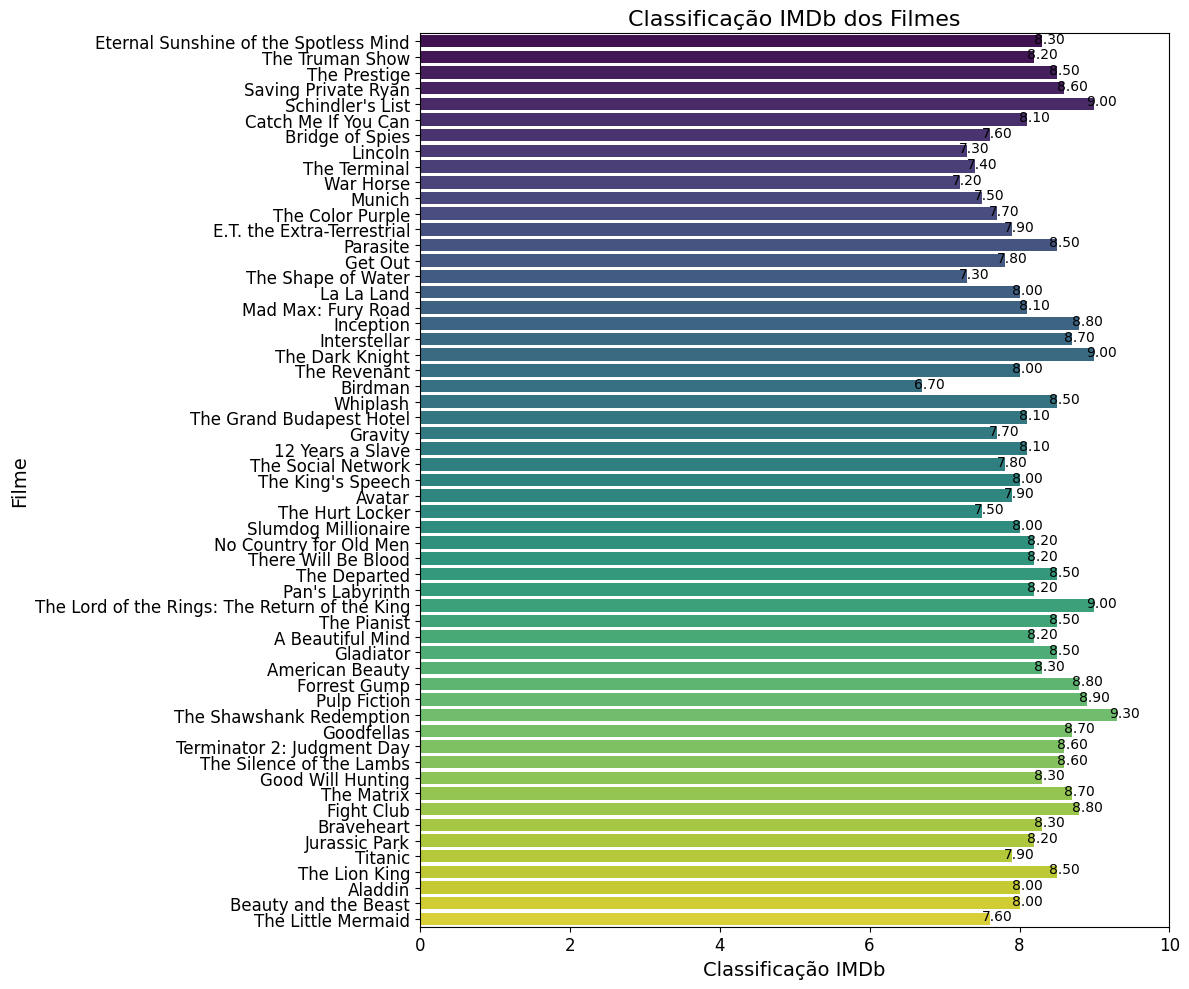

In [10]:
plt.figure(figsize=(12, 10))
ax = sns.barplot(x='imdbRating', y='Title', data=df, palette='viridis', ci=None)
plt.title('Classificação IMDb dos Filmes', fontsize=16)
plt.xlabel('Classificação IMDb', fontsize=14)
plt.ylabel('Filme', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 10)
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height() / 2. + 0.1, '{:1.2f}'.format(width), ha="center", fontsize=10)
plt.tight_layout()
plt.show()

C:\Users\pazj8\AppData\Local\Temp\ipykernel_28960\716133586.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Director', data=df, palette='viridis', order=df['Director'].value_counts().index[:10])


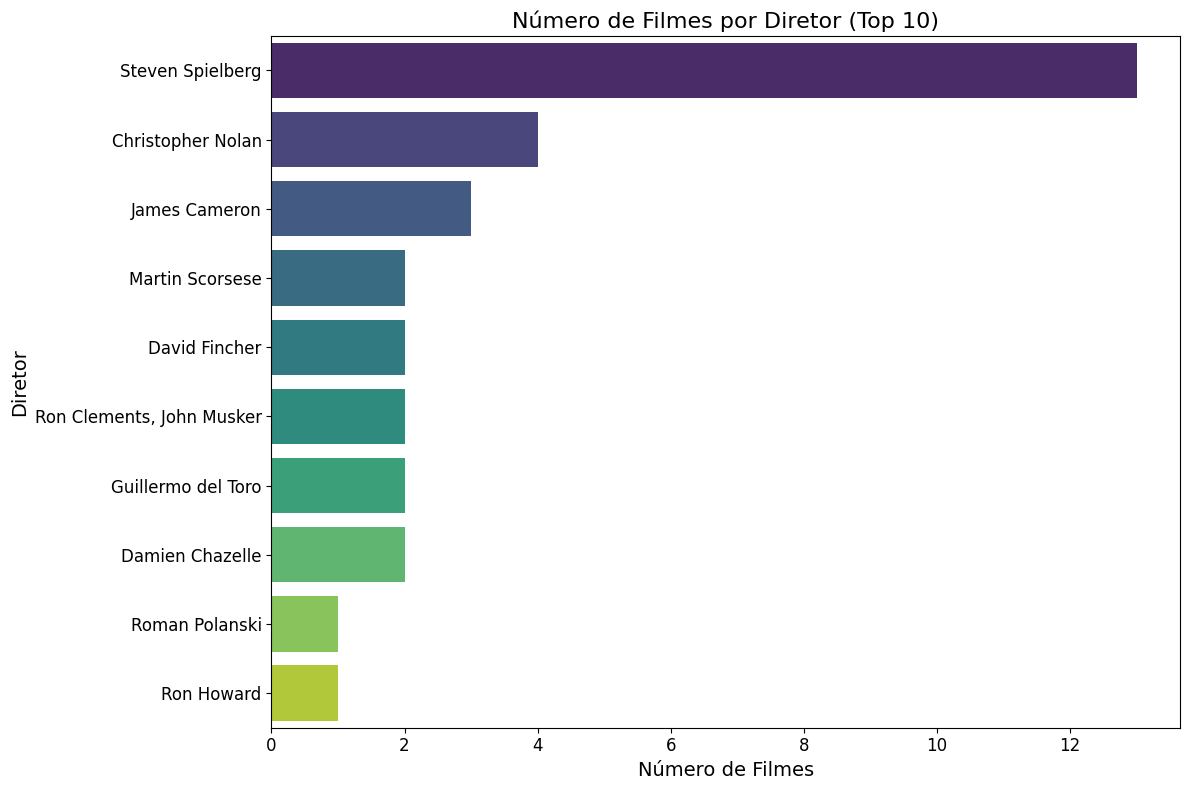

In [11]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Director', data=df, palette='viridis', order=df['Director'].value_counts().index[:10])
plt.title('Número de Filmes por Diretor (Top 10)', fontsize=16)
plt.xlabel('Número de Filmes', fontsize=14)
plt.ylabel('Diretor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\pazj8\AppData\Local\Temp\ipykernel_28960\1213992518.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Genre', data=df_exploded, palette='viridis', order=genre_counts.index)


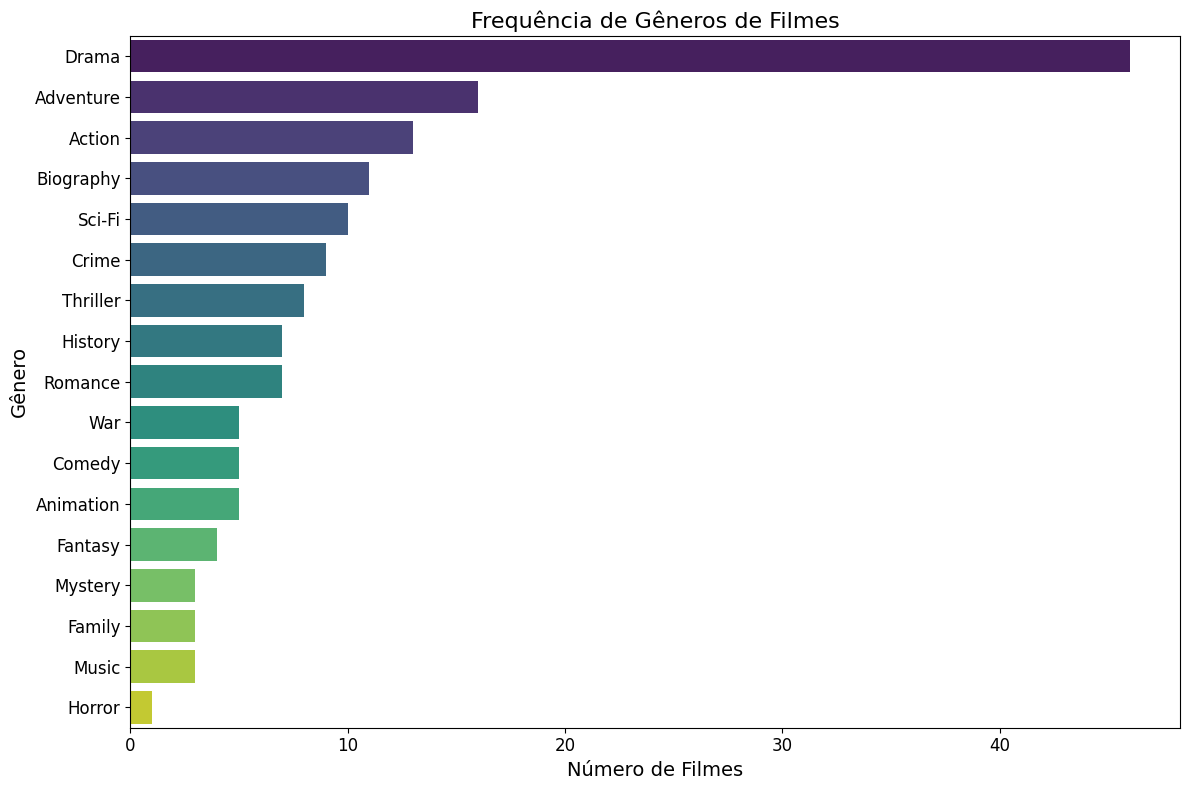

In [12]:
df_exploded = df.assign(Genre=df['Genre'].str.split(', ')).explode('Genre')
genre_counts = df_exploded['Genre'].value_counts()

plt.figure(figsize=(12, 8))
sns.countplot(y='Genre', data=df_exploded, palette='viridis', order=genre_counts.index)
plt.title('Frequência de Gêneros de Filmes', fontsize=16)
plt.xlabel('Número de Filmes', fontsize=14)
plt.ylabel('Gênero', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\pazj8\AppData\Local\Temp\ipykernel_28960\3702665521.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=decade_counts.index, y=decade_counts.values, palette='viridis')


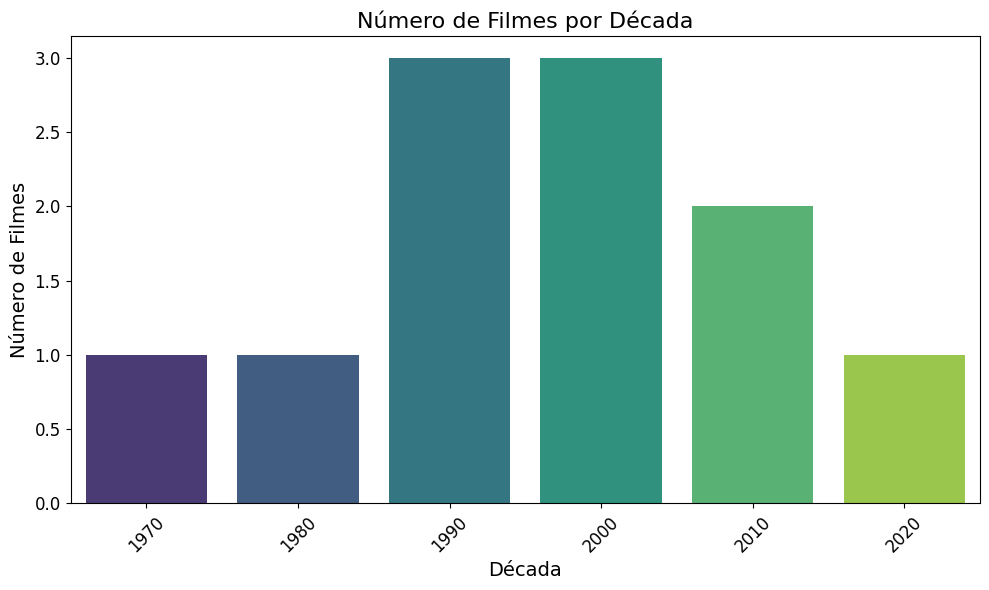

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Exemplo de DataFrame fictício para demonstração
data = {
    'Year': ['1990', '2005', '2015', '1967–1987', '2001', '1988', '1975', '1999', '2008', '2010', '1996', '2020']
}

df = pd.DataFrame(data)

# Converter anos válidos para inteiros, ignorando valores problemáticos
df['Decade'] = pd.to_numeric(df['Year'], errors='coerce').fillna(np.nan) // 10 * 10

# Remover NaNs que podem ter sido criados pela conversão
df = df.dropna(subset=['Decade'])

# Converter Decade para inteiros para remover .0
df['Decade'] = df['Decade'].astype(int)

# Contar o número de filmes por década
decade_counts = df['Decade'].value_counts().sort_index()

# Plotar o gráfico de barras das décadas
plt.figure(figsize=(10, 6))
sns.barplot(x=decade_counts.index, y=decade_counts.values, palette='viridis')
plt.title('Número de Filmes por Década', fontsize=16)
plt.xlabel('Década', fontsize=14)
plt.ylabel('Número de Filmes', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\pazj8\AppData\Local\Temp\ipykernel_28960\55350628.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='imdbRating', y='Genre', data=df_exploded, palette='viridis', order=genre_counts.index)


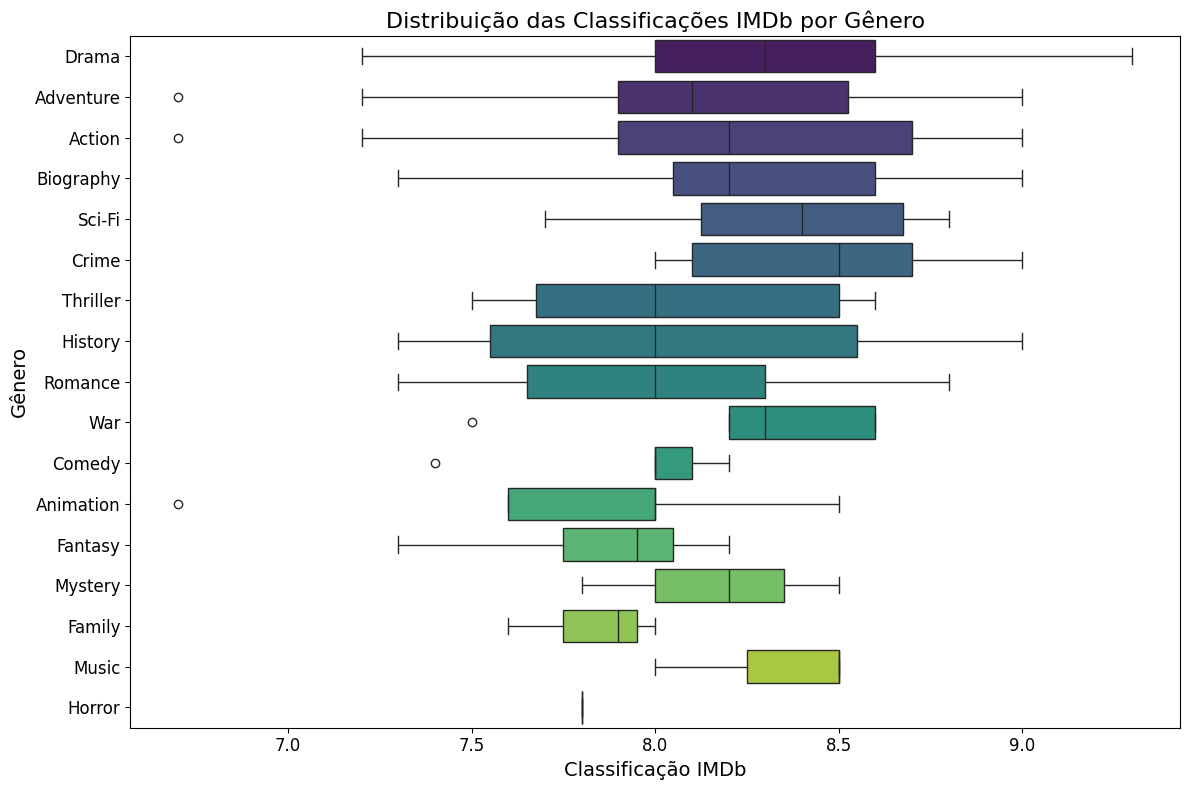

In [14]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='imdbRating', y='Genre', data=df_exploded, palette='viridis', order=genre_counts.index)
plt.title('Distribuição das Classificações IMDb por Gênero', fontsize=16)
plt.xlabel('Classificação IMDb', fontsize=14)
plt.ylabel('Gênero', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


   Year  Decade  imdbRating
0  1990    1990         8.3
1  2005    2000         8.2
2  2015    2010         8.5
3  2001    2000         8.6
4  1988    1980         9.0


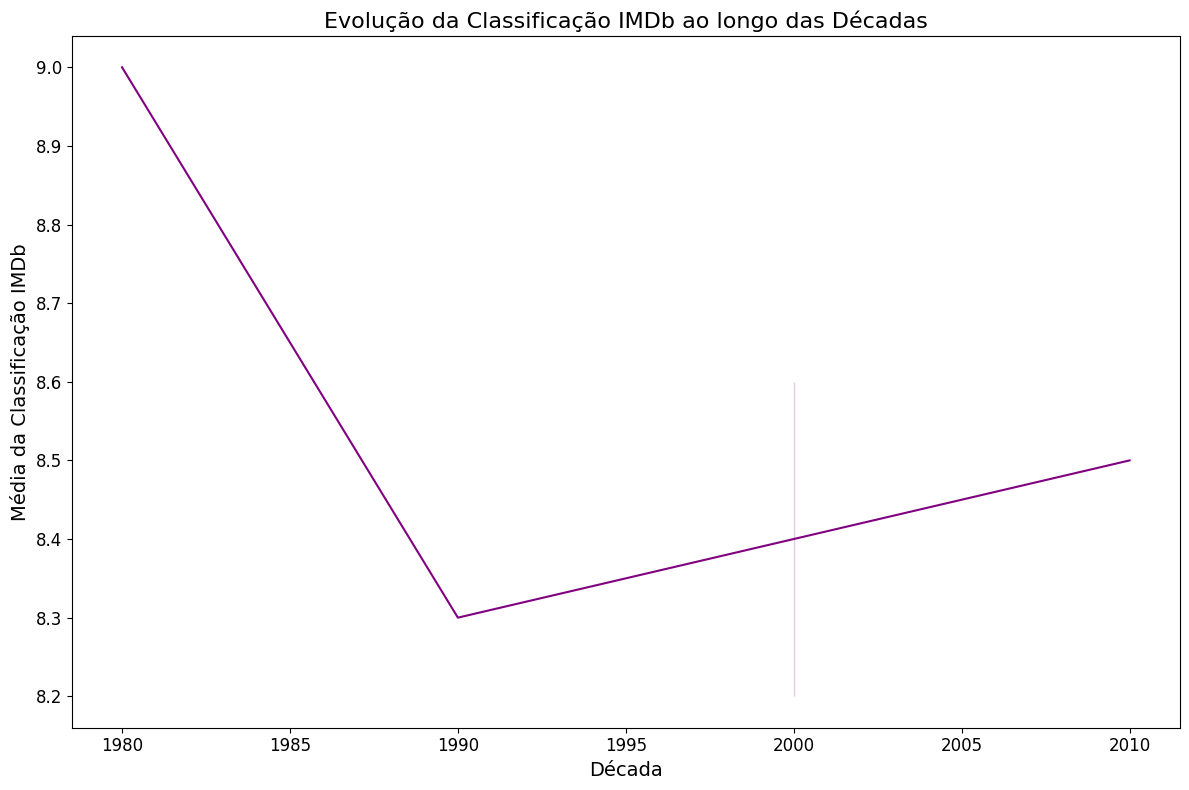

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dados de exemplo do DataFrame com Years e Decades
data = {
    'Year': [1990, 2005, 2015, 2001, 1988],
    'Decade': [1990, 2000, 2010, 2000, 1980]
}

# Criar o DataFrame
df = pd.DataFrame(data)

# Exemplo de classificações IMDb correspondentes
imdb_ratings = [8.3, 8.2, 8.5, 8.6, 9.0]  # Exemplo com 5 classificações IMDb para 5 filmes

# Verificar se o número de classificações IMDb corresponde ao número de filmes
if len(imdb_ratings) == len(df):
    df['imdbRating'] = imdb_ratings
else:
    print("O número de classificações IMDb não corresponde ao número de filmes no DataFrame.")

# Verificar se as classificações IMDb foram adicionadas corretamente
print(df)

# Plotar o gráfico de linha
plt.figure(figsize=(12, 8))
sns.lineplot(x='Decade', y='imdbRating', data=df, estimator='mean', color='purple')
plt.title('Evolução da Classificação IMDb ao longo das Décadas', fontsize=16)
plt.xlabel('Década', fontsize=14)
plt.ylabel('Média da Classificação IMDb', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\pazj8\AppData\Local\Temp\ipykernel_28960\2303855598.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Director', y='imdbRating', data=df, size='Year', sizes=(30, 300), palette='viridis')


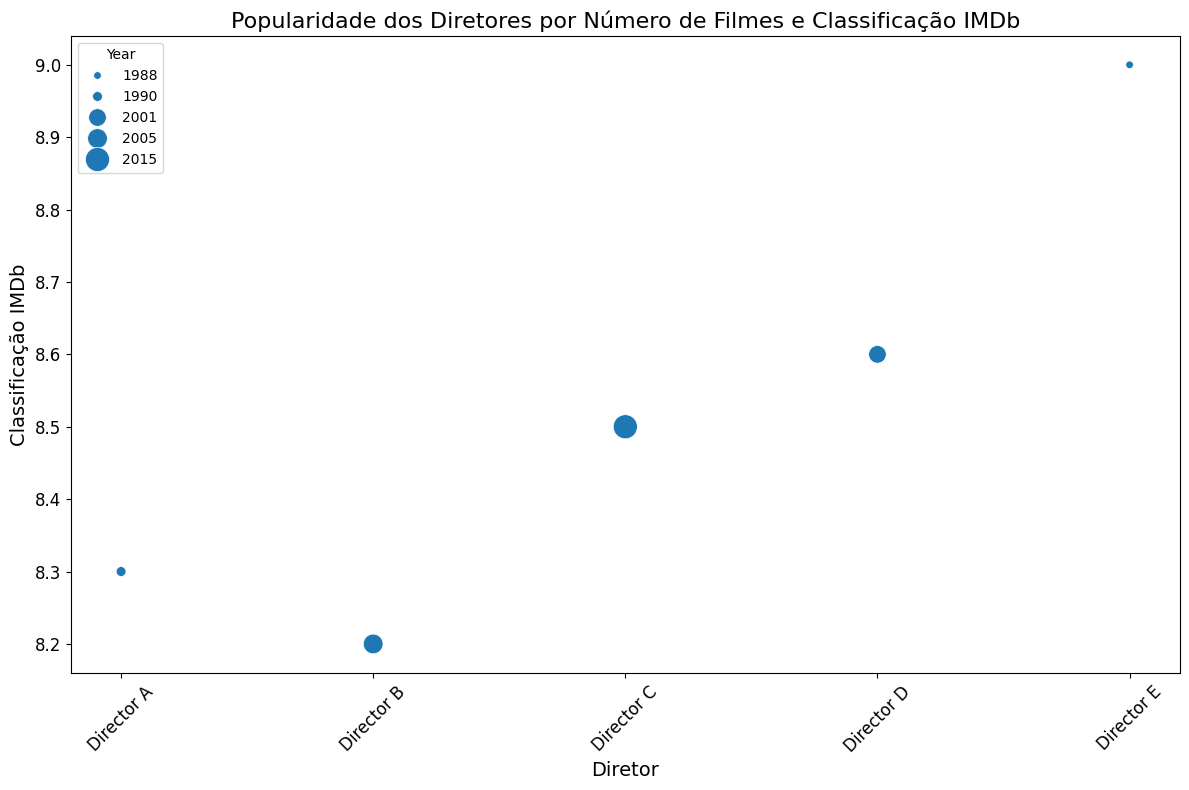

In [16]:
import pandas as pd

# Supondo que esta seja a lista de diretores correspondente aos dados existentes
directors = ['Director A', 'Director B', 'Director C', 'Director D', 'Director E']

# Incluir a coluna 'Director' no DataFrame df
df['Director'] = directors

# Agora podemos tentar criar o gráfico de dispersão novamente
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Director', y='imdbRating', data=df, size='Year', sizes=(30, 300), palette='viridis')
plt.title('Popularidade dos Diretores por Número de Filmes e Classificação IMDb', fontsize=16)
plt.xlabel('Diretor', fontsize=14)
plt.ylabel('Classificação IMDb', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\pazj8\AppData\Local\Temp\ipykernel_28960\251987652.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[count for word, count in common_words], y=[word for word, count in common_words], palette='viridis')


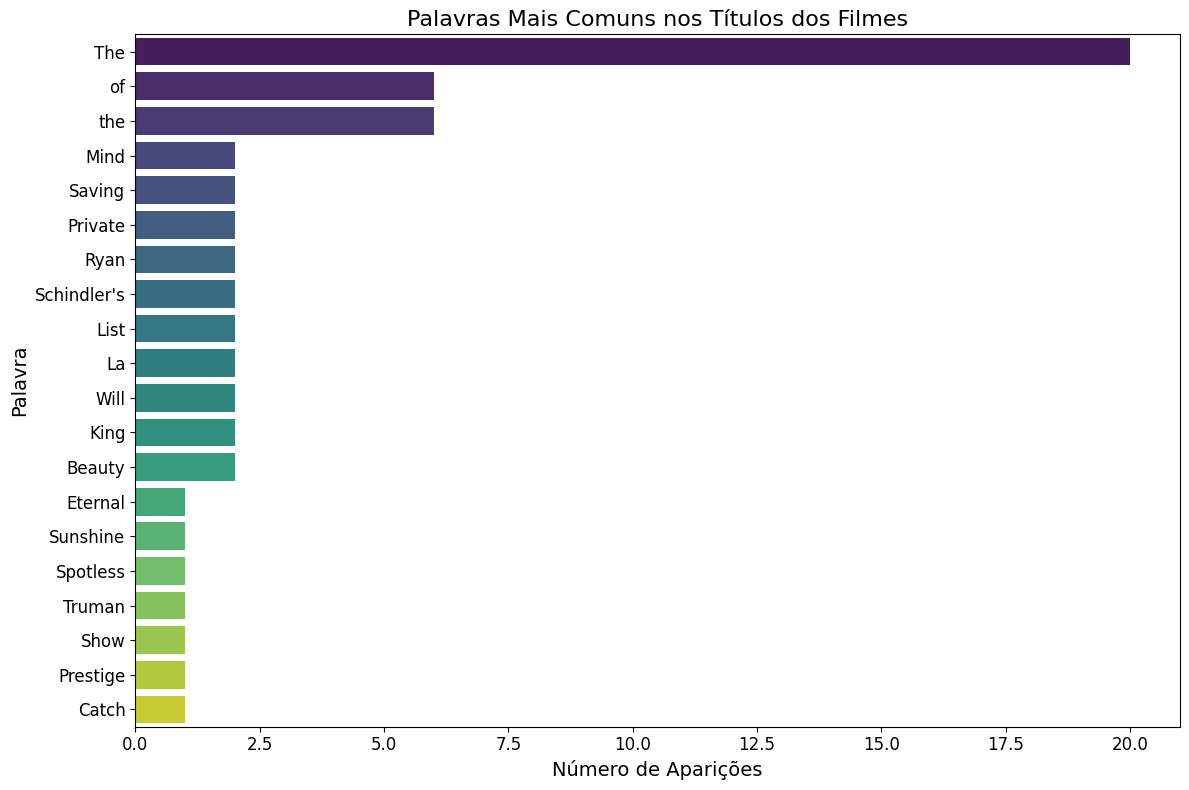

In [17]:
from collections import Counter

# Função para contar palavras nos títulos dos filmes
def count_words_in_titles(titles):
    words = []
    for title in titles:
        words.extend(title.split())
    return Counter(words)

word_counts = count_words_in_titles(movie_titles)

# Gráfico de Barras Horizontais das Palavras Mais Comuns
plt.figure(figsize=(12, 8))
common_words = word_counts.most_common(20)
sns.barplot(x=[count for word, count in common_words], y=[word for word, count in common_words], palette='viridis')
plt.title('Palavras Mais Comuns nos Títulos dos Filmes', fontsize=16)
plt.xlabel('Número de Aparições', fontsize=14)
plt.ylabel('Palavra', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


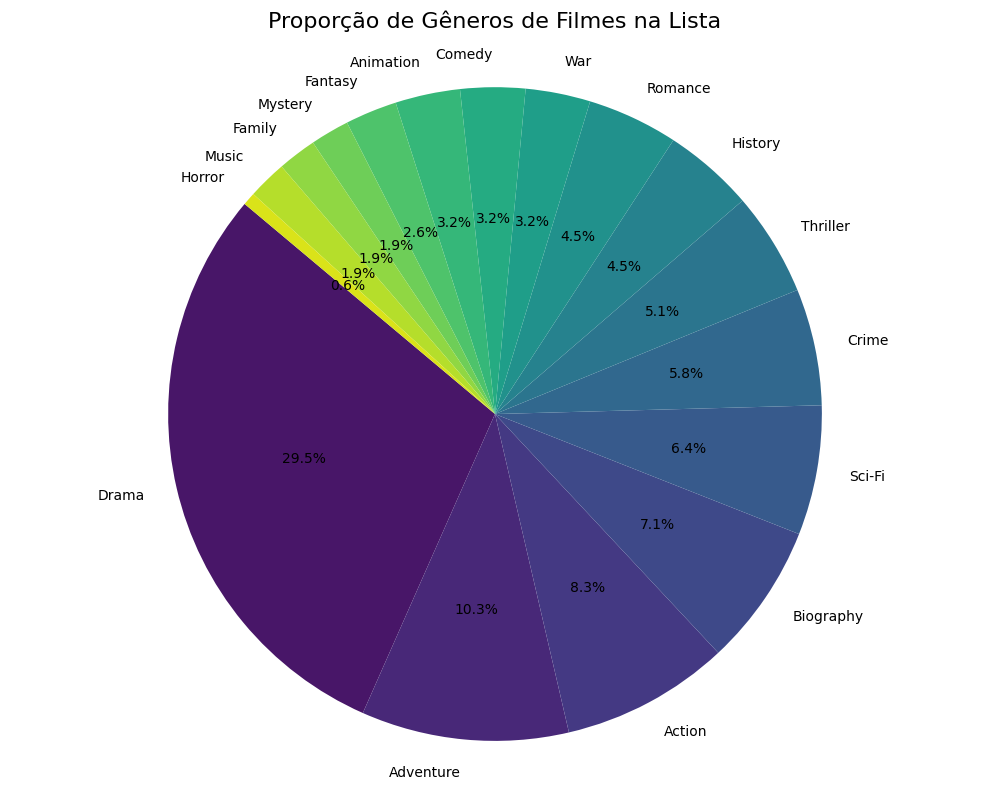

In [18]:
# Contagem de gêneros
genre_counts = df_exploded['Genre'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(genre_counts)))
plt.title('Proporção de Gêneros de Filmes na Lista', fontsize=16, pad=20)  # Adicionando 'pad' para aumentar o espaço entre o título e o gráfico
plt.axis('equal')
plt.tight_layout()
plt.show()